In [ ]:
import pandas as pd
import os
from IPython.display import Image
#import PIL.Image
# from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


### Compare FID scores

In [ ]:
summer2winter_dir = '/content/drive/MyDrive/CSC2516_Project/UNIT_summer2winter_small/results/FID.csv'
monet2photo_dir = '/content/drive/MyDrive/CSC2516_Project/UNIT_monet2photo_small/results/FID.csv'
cycleGAN_dir = '/content/drive/MyDrive/CSC2516_Project/CycleGAN FID.csv'

In [ ]:
summer2winter_df = pd.read_csv(summer2winter_dir)
monet2photo_df = pd.read_csv(monet2photo_dir)
cycleGAN_df = pd.read_csv(cycleGAN_dir)

In [ ]:
# compute average translation and reconstruction scores
summer2winter_df['avg_trans'] = (summer2winter_df['fid_val_A2B'] + summer2winter_df['fid_val_B2A'])/2
summer2winter_df['avg_rec'] = (summer2winter_df['fid_val_B2A2B'] + summer2winter_df['fid_val_A2B2A'])/2

monet2photo_df['avg_trans'] = (monet2photo_df['fid_val_A2B'] + monet2photo_df['fid_val_B2A'])/2
monet2photo_df['avg_rec'] = (monet2photo_df['fid_val_B2A2B'] + monet2photo_df['fid_val_A2B2A'])/2

In [ ]:
cycleGAN_df['avg_trans'] = (cycleGAN_df['fid_val_A2B'] + cycleGAN_df['fid_val_B2A'])/2
cycleGAN_df['avg_rec'] = (cycleGAN_df['fid_val_B2A2B'] + cycleGAN_df['fid_val_A2B2A'])/2

In [ ]:
cycleGAN_df.head()

,Dataset,learning rate,pool size,fid_val_A2B,fid_val_A2B2A,fid_val_B2A,fid_val_B2A2B,avg,avg_trans,avg_rec
0,summer2winter,0.0002,50,132.9257,72.5935,121.8117,92.2051,104.884000,127.36870,82.39930
1,summer2winter,0.0002,100,136.0985,77.1768,122.5110,101.0474,109.208425,129.30475,89.11210
2,summer2winter,0.0005,50,136.9048,92.3511,130.4611,100.4857,115.050675,133.68295,96.41840
3,summer2winter,0.0005,100,140.9938,84.2100,247.5979,201.5429,168.586150,194.29585,142.87645


#### Evaluate average translation score

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
summer2winter_df.sort_values(by=['avg_trans'],ascending=True).head()

,recon_kl_w,recon_kl_clc,lr_value,iteration,fid_val_A2B,fid_val_B2A,fid_val_B2A2B,fid_val_A2B2A,avg_trans,avg_rec
22,0.01,0.1,0.0001,24000,120.848063,99.508113,118.158324,152.035385,110.178088,135.096854
12,0.10,0.1,0.0001,24000,115.592574,109.653557,126.822156,121.173855,112.623066,123.998006
13,0.10,0.1,0.0001,32000,108.835541,117.752168,150.365012,126.715822,113.293855,138.540417
15,0.10,0.1,0.0001,48000,123.092077,105.182025,134.305879,154.121679,114.137051,144.213779
11,0.10,0.1,0.0001,16000,122.998143,105.996118,135.972327,151.154756,114.497130,143.563541


In [ ]:
unit_summerwinter_df_plot = summer2winter_df[(summer2winter_df['iteration'] == 24000) & (summer2winter_df['recon_kl_w'] == summer2winter_df['recon_kl_clc'])][['recon_kl_w', 'avg_trans']]
unit_summerwinter_df_plot['Dataset'] = 'summer2winter'

In [ ]:
unit_summerwinter_df_plot

,recon_kl_w,avg_trans,Dataset
2,0.01,129.933339,summer2winter
12,0.10,112.623066,summer2winter


In [ ]:
monet2photo_df.sort_values(by=['avg_trans'],ascending=True).head(2)

,recon_kl_w,recon_kl_clc,lr_value,iteration,fid_val_A2B,fid_val_A2B2A,fid_val_B2A,fid_val_B2A2B,avg_trans,avg_rec
65,0.01,0.01,0.0001,48000,209.276862,225.306385,156.551483,262.637630,182.914173,243.972007
68,0.01,0.01,0.0001,72000,210.984037,227.811789,160.267377,265.727079,185.625707,246.769434


In [ ]:
df_plot = monet2photo_df[(monet2photo_df['iteration'] == 48000) & (monet2photo_df['lr_value']  == 0.0001)][['recon_kl_w', 'avg_trans']]
unit_monet2photo_df_plot = df_plot.drop_duplicates().drop(labels=[5,15], axis=0)
unit_monet2photo_df_plot['Dataset'] = 'monet2photo'

In [ ]:
unit_df_plot = unit_summerwinter_df_plot.append(unit_monet2photo_df_plot)

In [ ]:
unit_df_plot

,recon_kl_w,avg_trans,Dataset
2,0.01,129.933339,summer2winter
12,0.10,112.623066,summer2winter
65,0.01,182.914173,monet2photo
75,0.10,191.027081,monet2photo


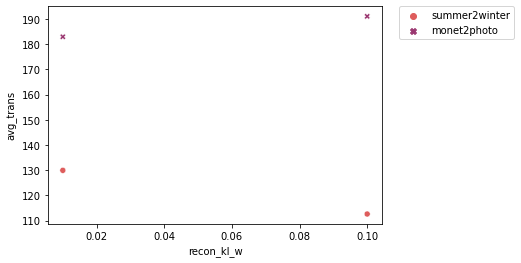

In [ ]:
sns.scatterplot(data = unit_df_plot, x="recon_kl_w", y="avg_trans", hue="Dataset", style="Dataset",
                palette="flare", markers=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
sns.scatterplot(data = unit_summerwinter_df_plot, x="recon_kl_w", y="avg_trans", palette="flare", markers=True)

#### CycleGAN

In [ ]:
cycleGAN_df[cycleGAN_df['Dataset'] == 'summer2winter'].sort_values(by=['avg_trans'],ascending=True).head(2)

,Dataset,learning rate,pool size,fid_val_A2B,fid_val_A2B2A,fid_val_B2A,fid_val_B2A2B,avg,avg_trans,avg_rec
0,summer2winter,0.0002,50,132.9257,72.5935,121.8117,92.2051,104.884000,127.36870,82.3993
1,summer2winter,0.0002,100,136.0985,77.1768,122.5110,101.0474,109.208425,129.30475,89.1121


In [ ]:
cycleGAN_df[cycleGAN_df['Dataset'] == 'summer2winter']

,Dataset,learning rate,pool size,fid_val_A2B,fid_val_A2B2A,fid_val_B2A,fid_val_B2A2B,avg,avg_trans,avg_rec
0,summer2winter,0.0002,50,132.9257,72.5935,121.8117,92.2051,104.884000,127.36870,82.39930
1,summer2winter,0.0002,100,136.0985,77.1768,122.5110,101.0474,109.208425,129.30475,89.11210
2,summer2winter,0.0005,50,136.9048,92.3511,130.4611,100.4857,115.050675,133.68295,96.41840
3,summer2winter,0.0005,100,140.9938,84.2100,247.5979,201.5429,168.586150,194.29585,142.87645


In [ ]:
cycle_summer2winter_df_plot = cycleGAN_df[cycleGAN_df['Dataset'] == 'summer2winter']

In [ ]:
cycleGAN_df[cycleGAN_df['Dataset'] == 'monet2photo'].sort_values(by=['avg_trans'],ascending=True).head(2)

,Dataset,learning rate,pool size,fid_val_A2B,fid_val_A2B2A,fid_val_B2A,fid_val_B2A2B,avg,avg_trans,avg_rec


### Compare image translation quality 

In [ ]:
summer2winter_cycleGAN_results = '/content/drive/MyDrive/results/s2w_cyclegan_lr_2_poolsize_50/'
monet2photo_cycleGAN_results = '/content/drive/MyDrive/results/m2p_cyclegan_lr_2_poolsize_50/'
summer2winter_UNIT_results = '/content/drive/MyDrive/CSC2516_Project/UNIT_summer2winter_small/results/'
monet2photo_UNIT_results = '/content/drive/MyDrive/CSC2516_Project/UNIT_monet2photo_small/results/'
summer2winter_A2B_save_path = '/content/drive/MyDrive/CSC2516_Project/summer2winter_qualitative/A2B/'
summer2winter_B2A_save_path = '/content/drive/MyDrive/CSC2516_Project/summer2winter_qualitative/B2A/'
monet2photo_A2B_save_path = '/content/drive/MyDrive/CSC2516_Project/monet2photo_qualitative/A2B/'
monet2photo_B2A_save_path = '/content/drive/MyDrive/CSC2516_Project/monet2photo_qualitative/B2A/'

summer2winter_UNIT_folder_name ='/kl_w_0.01kl_clc_0.1_lr_valie_0.0001/'
monet2photo_UNIT_folder_name ='/kl_w_0.01kl_clc_0.01_lr_valie_0.0001/'
cycleGAN_folder_lists = ['fake_A', 'fake_B']
UNIT_folder_lists = ['A2B','B2A']

In [ ]:
def merge_images(real_img, cycle_img, unit_img):
  new_image = Image.new('RGB',(128, 3*128), (128,128,128))
  new_image.paste(real_img,(0,0))
  new_image.paste(cycle_img,(0,128))
  new_image.paste(unit_img, (0,256))
  return new_image

#### <font color='green'>Summer2winter image comparisons</font>

<font color='blue'>A2B comparisons</font>

In [ ]:
real_A = os.listdir(summer2winter_cycleGAN_results+'real_A')
cycleGAN_image_list = os.listdir(summer2winter_cycleGAN_results+'fake_B')
UNIT_image_list = os.listdir(summer2winter_UNIT_results+'A2B/'+summer2winter_UNIT_folder_name)

In [ ]:
for imageA in real_A:
  cycle_name = imageA.replace('real_A', 'fake_B')
  unit_name = imageA.replace('_real_A', '').replace('png','jpg')
  real_A_img = Image.open(summer2winter_cycleGAN_results+'real_A/' + imageA).resize((128, 128), Image.ANTIALIAS)  #.open
  fake_B_cycleGAN = Image.open(summer2winter_cycleGAN_results+'fake_B/' + cycle_name).resize((128, 128), Image.ANTIALIAS)
  fake_B_UNIT = Image.open(summer2winter_UNIT_results  + 'A2B' + UNIT_folder_name + unit_name).resize((128, 128), Image.ANTIALIAS)
  
  # merge the images:
  new_image = merge_images(real_B_img, fake_B_cycleGAN, fake_B_UNIT)

  # saving the image
  new_image.save(summer2winter_A2B_save_path + unit_name,"JPEG")

<font color='blue'>B2A comparisons</font>

In [ ]:
real_B = os.listdir(summer2winter_cycleGAN_results+'real_B')
cycleGAN_image_list = os.listdir(summer2winter_cycleGAN_results+'fake_A')
UNIT_image_list = os.listdir(summer2winter_UNIT_results+'B2A/'+summer2winter_UNIT_folder_name)
UNIT_image_list.sort()

In [ ]:
index = 0 
for imageB in real_B:
  cycle_name = imageB.replace('real_B', 'fake_A')
  unit_name = UNIT_image_list[index] # imageB.replace('_real_B', '').replace('png','jpg')
  real_B_img = Image.open(summer2winter_cycleGAN_results+'real_B/' + imageB).resize((128, 128), Image.ANTIALIAS)  #.open
  fake_A_cycleGAN = Image.open(summer2winter_cycleGAN_results+'fake_A/' + cycle_name).resize((128, 128), Image.ANTIALIAS)
  fake_A_UNIT = Image.open(summer2winter_UNIT_results  + 'B2A' + UNIT_folder_name + unit_name).resize((128, 128), Image.ANTIALIAS)
  
  # merge the images:
  new_image = merge_images(real_B_img, fake_A_cycleGAN, fake_A_UNIT)

  # saving the image
  new_image.save(summer2winter_B2A_save_path + unit_name,"JPEG")

  index+= 1

#### <font color='green'> monet2photo image comparisons </font>

<font color='blue'>A2B comparisons</font>

In [ ]:
real_A = os.listdir(monet2photo_cycleGAN_results+'real_A')
cycleGAN_image_list = os.listdir(monet2photo_cycleGAN_results+'fake_B')
UNIT_image_list = os.listdir(monet2photo_UNIT_results+'A2B/'+monet2photo_UNIT_folder_name)

In [ ]:
for imageA in real_A:
  cycle_name = imageA.replace('real_A', 'fake_B')
  unit_name = imageA.replace('_real_A', '').replace('png','jpg')
  real_A_img = Image.open(monet2photo_cycleGAN_results+'real_A/' + imageA).resize((128, 128), Image.ANTIALIAS)  #.open
  fake_B_cycleGAN = Image.open(monet2photo_cycleGAN_results+'fake_B/' + cycle_name).resize((128, 128), Image.ANTIALIAS)
  fake_B_UNIT = Image.open(monet2photo_UNIT_results  + 'A2B' + monet2photo_UNIT_folder_name + unit_name).resize((128, 128), Image.ANTIALIAS)
  
  # merge the images:
  new_image = merge_images(real_A_img, fake_B_cycleGAN, fake_B_UNIT)

  # saving the image
  new_image.save(monet2photo_A2B_save_path + unit_name,"JPEG")

<font color='blue'>B2A comparisons</font>

In [ ]:
real_B = os.listdir(monet2photo_cycleGAN_results+'real_B')
cycleGAN_image_list = os.listdir(monet2photo_cycleGAN_results+'fake_A')
UNIT_image_list = os.listdir(monet2photo_UNIT_results+'B2A/'+monet2photo_UNIT_folder_name)
UNIT_image_list.sort()

In [ ]:
index = 0 
for imageB in real_B:
  cycle_name = imageB.replace('real_B', 'fake_A')
  unit_name = UNIT_image_list[index] # imageB.replace('_real_B', '').replace('png','jpg')
  real_B_img = Image.open(monet2photo_cycleGAN_results+'real_B/' + imageB).resize((128, 128), Image.ANTIALIAS)  #.open
  fake_A_cycleGAN = Image.open(monet2photo_cycleGAN_results+'fake_A/' + cycle_name).resize((128, 128), Image.ANTIALIAS)
  fake_A_UNIT = Image.open(monet2photo_UNIT_results  + 'B2A' + monet2photo_UNIT_folder_name + unit_name).resize((128, 128), Image.ANTIALIAS)
  
  # merge the images:
  new_image = merge_images(real_B_img, fake_A_cycleGAN, fake_A_UNIT)

  # saving the image
  new_image.save(monet2photo_B2A_save_path + unit_name,"JPEG")

  index+= 1